# TP Estimation Statistique Avancée

Dans ce TP, nous allons explorer différentes méthodes d'estimation statistique :
* Estimation ponctuelle (méthode des moments et maximum de vraisemblance)
* Estimation par intervalle de confiance pour une moyenne (variance connue et inconnue)

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize


# Configuration de l'affichage
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(0)  # Pour la reproductibilité

## 1. Estimation ponctuelle

L'estimation ponctuelle consiste à estimer un paramètre inconnu d'une distribution par une valeur unique calculée à partir d'un échantillon. Nous allons explorer deux méthodes principales :
* Méthode des moments
* Maximum de vraisemblance

### 1.1 Méthode des moments

La méthode des moments consiste à égaler les moments théoriques de la distribution aux moments empiriques calculés à partir de l'échantillon.

Prenons l'exemple d'une distribution exponentielle où nous voulons estimer le paramètre λ.

In [2]:
# Génération d'un échantillon suivant une loi exponentielle
lambda_true = 0.5  # Valeur réelle du paramètre λ
taille_echantillon = 1000
echantillon_exp = np.random.exponential(scale=1/lambda_true, size=taille_echantillon)

In [5]:
echantillon_exp

array([1.59174902e+00, 2.51186153e+00, 1.84644629e+00, 1.57440230e+00,
       1.10209698e+00, 2.07631859e+00, 1.15103840e+00, 4.44704883e+00,
       6.62982436e+00, 9.67204202e-01, 3.13779228e+00, 1.50534822e+00,
       1.67886569e+00, 5.19650831e+00, 1.47370710e-01, 1.82322058e-01,
       4.08511734e-02, 3.57497536e+00, 3.01156846e+00, 4.08062856e+00,
       7.69044368e+00, 3.21047912e+00, 1.23785892e+00, 3.03307195e+00,
       2.51748824e-01, 2.04286377e+00, 3.09459365e-01, 5.78884090e+00,
       1.47565456e+00, 1.07113144e+00, 6.14560706e-01, 2.97650968e+00,
       1.21816483e+00, 1.68066941e+00, 3.79371433e-02, 1.92276186e+00,
       1.89399336e+00, 1.91909595e+00, 5.75583016e+00, 2.29027792e+00,
       8.91036985e-01, 1.14906482e+00, 2.39221560e+00, 1.24230592e-01,
       2.19782496e+00, 2.22119487e+00, 4.72413411e-01, 2.76057375e-01,
       7.57923932e-01, 9.04204113e-01, 1.68885556e+00, 1.15464862e+00,
       8.90899476e+00, 2.15270225e-01, 4.68603031e-01, 3.51827107e-01,
      

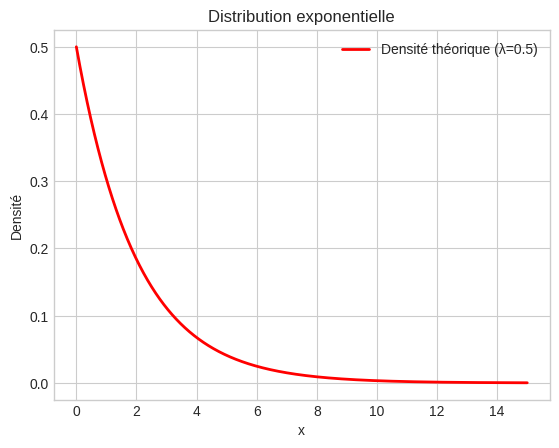

In [19]:
# Superposition de la densité théorique
x = np.linspace(0, 15, 1001)
y = lambda_true * np.exp(-lambda_true * x)
plt.plot(x, y, 'r-', linewidth=2, label=f'Densité théorique (λ={lambda_true})')

plt.title('Distribution exponentielle')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.show()

In [18]:
x = np.linspace(0, 15, 1001)
x

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ], shape=(1001,))

(array([0.44156379, 0.3574564 , 0.2260386 , 0.17347149, 0.14368345,
        0.08235515, 0.06308054, 0.07008949, 0.04555817, 0.03329251,
        0.02978803, 0.02453132, 0.01752237, 0.01752237, 0.00525671,
        0.00525671, 0.00700895, 0.        , 0.00175224, 0.        ,
        0.        , 0.00175224, 0.        , 0.00175224, 0.        ,
        0.00175224, 0.        , 0.        , 0.        , 0.00175224]),
 array([1.09222798e-03, 5.71791204e-01, 1.14249018e+00, 1.71318916e+00,
        2.28388813e+00, 2.85458711e+00, 3.42528608e+00, 3.99598506e+00,
        4.56668404e+00, 5.13738301e+00, 5.70808199e+00, 6.27878096e+00,
        6.84947994e+00, 7.42017892e+00, 7.99087789e+00, 8.56157687e+00,
        9.13227584e+00, 9.70297482e+00, 1.02736738e+01, 1.08443728e+01,
        1.14150717e+01, 1.19857707e+01, 1.25564697e+01, 1.31271687e+01,
        1.36978677e+01, 1.42685666e+01, 1.48392656e+01, 1.54099646e+01,
        1.59806636e+01, 1.65513625e+01, 1.71220615e+01]),
 <BarContainer object of 30 

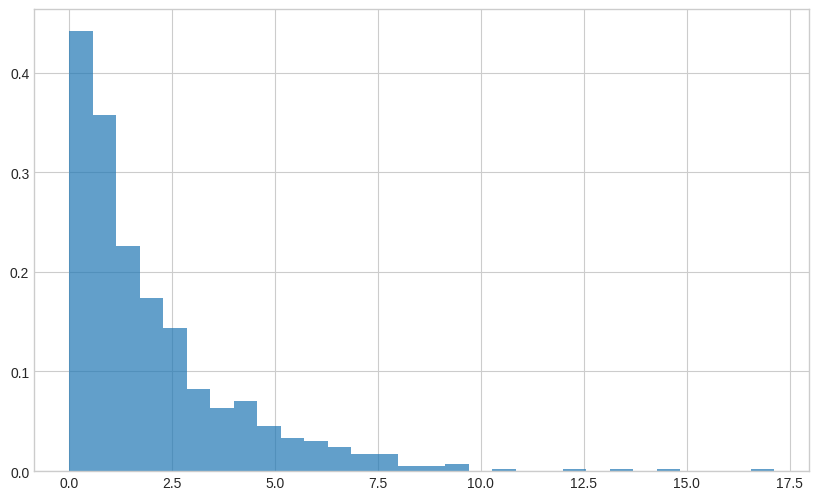

In [20]:
# Visualisation de l'échantillon
plt.figure(figsize=(10, 6))
plt.hist(echantillon_exp, bins=30, density=True, alpha=0.7, label='Échantillon')

In [21]:
# Estimation de λ par la méthode des moments
# Pour une loi exponentielle, E[X] = 1/λ
# Donc λ = 1/E[X]
lambda_moments = 1 / np.mean(echantillon_exp)

print(f"Valeur réelle de λ : {lambda_true}")
print(f"Estimation de λ par la méthode des moments : {lambda_moments:.6f}")
print(f"Erreur relative : {100 * abs(lambda_moments - lambda_true) / lambda_true:.2f}%")

Valeur réelle de λ : 0.5
Estimation de λ par la méthode des moments : 0.498236
Erreur relative : 0.35%


Illustrons maintenant la méthode des moments pour une distribution normale où nous voulons estimer μ et σ².

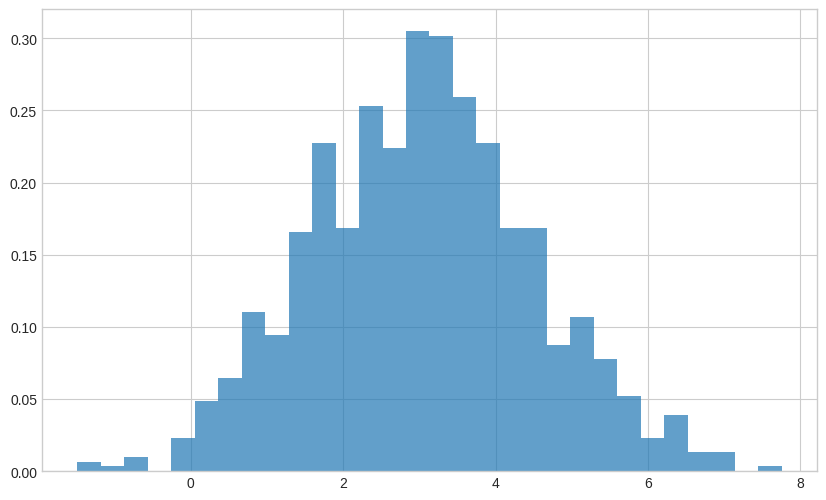

In [22]:
# Génération d'un échantillon suivant une loi normale
mu_true = 3
sigma_true = 1.5
echantillon_norm = np.random.normal(loc=mu_true, scale=sigma_true, size=taille_echantillon)

# Visualisation de l'échantillon
plt.figure(figsize=(10, 6))
plt.hist(echantillon_norm, bins=30, density=True, alpha=0.7, label='Échantillon')
plt.show()

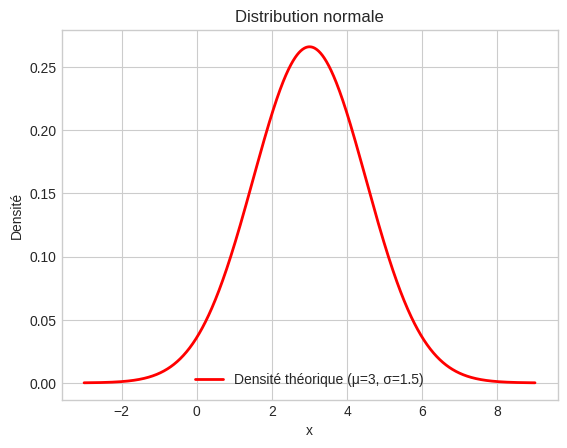

In [ ]:
# Superposition de la densité théorique
x = np.linspace(mu_true - 4*sigma_true, mu_true + 4*sigma_true, 1001)
y = stats.norm.pdf(x, mu_true, sigma_true)
plt.plot(x, y, 'r-', linewidth=2, label=f'Densité théorique (μ={mu_true}, σ={sigma_true})')

plt.title('Distribution normale')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.show()

In [24]:
# Estimation par la méthode des moments
# Pour une loi normale, E[X] = μ et Var(X) = σ²
mu_moments = np.mean(echantillon_norm)
sigma2_moments = np.var(echantillon_norm)
sigma_moments = np.sqrt(sigma2_moments)

print(f"Valeurs réelles : μ = {mu_true}, σ = {sigma_true}, σ² = {sigma_true**2}")
print(f"Estimations par la méthode des moments :")
print(f"  μ = {mu_moments:.6f}")
print(f"  σ = {sigma_moments:.6f}")
print(f"  σ² = {sigma2_moments:.6f}")
print(f"Erreurs relatives : μ = {100 * abs(mu_moments - mu_true) / mu_true:.2f}%, σ = {100 * abs(sigma_moments - sigma_true) / sigma_true:.2f}%")

Valeurs réelles : μ = 3, σ = 1.5, σ² = 2.25
Estimations par la méthode des moments :
  μ = 3.043566
  σ = 1.449253
  σ² = 2.100335
Erreurs relatives : μ = 1.45%, σ = 3.38%


### 1.2 Maximum de vraisemblance

Le principe du maximum de vraisemblance consiste à choisir comme estimateur la valeur du paramètre qui maximise la probabilité d'observer l'échantillon donné.

Commençons par l'exemple de la loi exponentielle.

In [ ]:
# Fonction de log-vraisemblance pour une loi exponentielle
def minus_log_vraisemblance_exp(lambda_val, data):
    # log L(λ) = n log(λ) - λ Σx_i
    n = len(data)
    return -1 * (n * np.log(lambda_val) - lambda_val * np.sum(data))  # On minimise -log L

# Estimation de λ par maximum de vraisemblance
resultat = minimize(minus_log_vraisemblance_exp, x0=[0.1], args=(echantillon_exp,), bounds=[(1e-10, None)])
lambda_mle = resultat.x[0]

# Comparaison avec la méthode des moments
print(f"Valeur réelle de λ : {lambda_true}")
print(f"Estimation de λ par maximum de vraisemblance : {lambda_mle:.6f}")
print(f"Estimation de λ par la méthode des moments : {lambda_moments:.6f}")
print(f"Erreur relative (MLE) : {100 * abs(lambda_mle - lambda_true) / lambda_true:.2f}%")

Valeur réelle de λ : 0.5
Estimation de λ par maximum de vraisemblance : 0.498236
Estimation de λ par la méthode des moments : 0.498236
Erreur relative (MLE) : 0.35%


Pour une loi exponentielle, l'estimateur du maximum de vraisemblance est en fait identique à l'estimateur des moments : λ = 1/x̄.

Vérifions :

In [ ]:
# Calcul direct de l'estimateur du maximum de vraisemblance
lambda_mle_direct = 1 / np.mean(echantillon_exp)
print(f"MLE direct : {lambda_mle_direct:.6f}")
print(f"MLE par optimisation : {lambda_mle:.6f}")
print(f"Différence : {abs(lambda_mle_direct - lambda_mle):.10f}")

Maintenant, utilisons le maximum de vraisemblance pour estimer les paramètres d'une distribution normale.

In [26]:
# Fonction de log-vraisemblance pour une loi normale
def minus_log_vraisemblance_norm(params, data):
    mu, sigma = params
    n = len(data)
    # log L(μ,σ) = -n/2 log(2π) - n log(σ) - 1/(2σ²) Σ(x_i - μ)²
    return -1 * (-n/2 * np.log(2*np.pi) - n * np.log(sigma) - 1/(2*sigma**2) * np.sum((data - mu)**2))

# Estimation par maximum de vraisemblance
resultat = minimize(minus_log_vraisemblance_norm, x0=[0, 1], args=(echantillon_norm,), bounds=[(None, None), (1e-10, None)])
mu_mle, sigma_mle = resultat.x

# Comparaison avec la méthode des moments
print(f"Valeurs réelles : μ = {mu_true}, σ = {sigma_true}")
print(f"Estimations par maximum de vraisemblance : μ = {mu_mle:.6f}, σ = {sigma_mle:.6f}")
print(f"Estimations par la méthode des moments : μ = {mu_moments:.6f}, σ = {sigma_moments:.6f}")

Valeurs réelles : μ = 3, σ = 1.5
Estimations par maximum de vraisemblance : μ = 3.043568, σ = 1.449250
Estimations par la méthode des moments : μ = 3.043566, σ = 1.449253


Pour une loi normale, les estimateurs du maximum de vraisemblance pour μ et σ sont :
- μ̂ = 1/n Σx_i (la moyenne empirique)
- σ̂² = 1/n Σ(x_i - μ̂)² (la variance biaisée)

Vérifions :

In [ ]:
# Calcul direct des estimateurs du maximum de vraisemblance
mu_mle_direct = np.mean(echantillon_norm)
# Notez que c'est la variance biaisée (divisée par n et non par n-1)
sigma_mle_direct = np.sqrt(np.sum((echantillon_norm - mu_mle_direct)**2) / len(echantillon_norm))

print(f"MLE direct : μ = {mu_mle_direct:.6f}, σ = {sigma_mle_direct:.6f}")
print(f"MLE par optimisation : μ = {mu_mle:.6f}, σ = {sigma_mle:.6f}")

Visualisons la fonction de vraisemblance pour la loi normale :

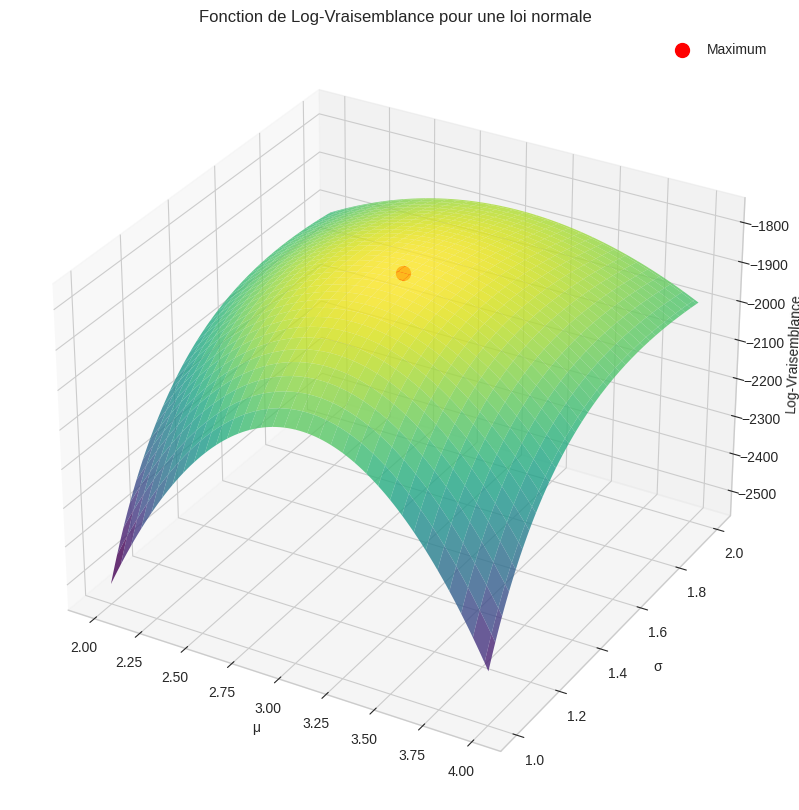

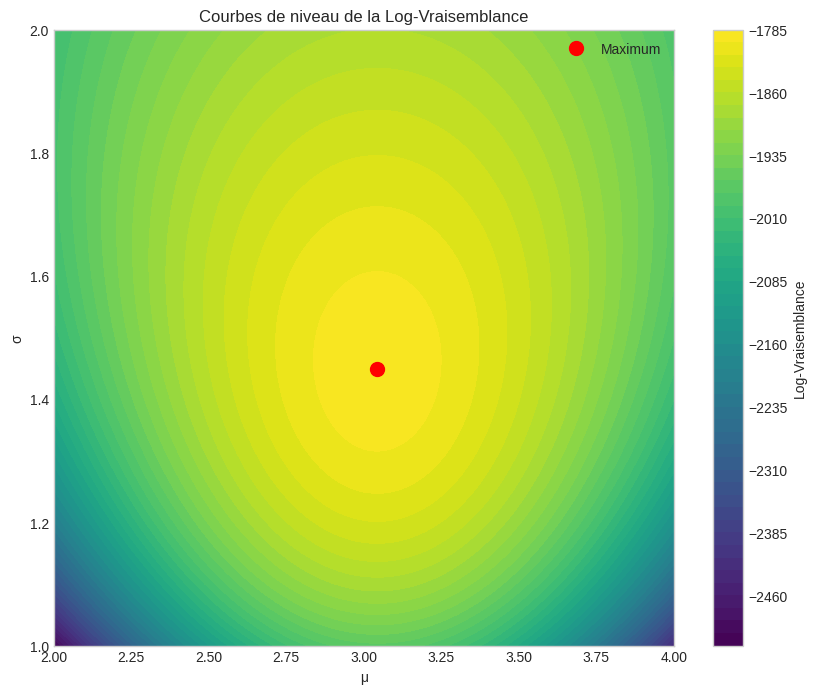

In [34]:
# Création d'une grille de valeurs pour μ et σ
mu_range = np.linspace(mu_true - 1, mu_true + 1, 101)
sigma_range = np.linspace(sigma_true - 0.5, sigma_true + 0.5, 101)
mu_grid, sigma_grid = np.meshgrid(mu_range, sigma_range)

# Calcul de la log-vraisemblance pour chaque point de la grille
log_vrais = np.zeros(mu_grid.shape)
for i in range(len(mu_range)):
    for j in range(len(sigma_range)):
        log_vrais[j, i] = -minus_log_vraisemblance_norm([mu_grid[j, i], sigma_grid[j, i]], echantillon_norm)

# Visualisation en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(mu_grid, sigma_grid, log_vrais, cmap='viridis', alpha=0.8)
ax.set_xlabel('μ')
ax.set_ylabel('σ')
ax.set_zlabel('Log-Vraisemblance')
ax.set_title('Fonction de Log-Vraisemblance pour une loi normale')

# Ajout du point maximum
ax.scatter([mu_mle], [sigma_mle], [-minus_log_vraisemblance_norm([mu_mle, sigma_mle], echantillon_norm)], 
           color='red', s=100, label='Maximum')
ax.legend()
plt.show()

# Visualisation en 2D (courbes de niveau)
plt.figure(figsize=(10, 8))
contour = plt.contourf(mu_grid, sigma_grid, log_vrais, 50, cmap='viridis')
plt.colorbar(contour, label='Log-Vraisemblance')
plt.plot(mu_mle, sigma_mle, 'ro', markersize=10, label='Maximum')
plt.xlabel('μ')
plt.ylabel('σ')
plt.title('Courbes de niveau de la Log-Vraisemblance')
plt.legend()
plt.show()

## 2. Estimation par intervalle de confiance

Un intervalle de confiance fournit une plage de valeurs plausibles pour un paramètre inconnu, avec un certain niveau de confiance (généralement 95%).

### 2.1 Intervalle de confiance pour la moyenne d'une loi normale (variance connue)

Supposons que nous connaissons la variance σ² de la population et que nous voulons estimer la moyenne μ.

In [35]:
# Génération d'un nouvel échantillon
mu_true = 10
sigma_true = 2
taille_echantillon = 50  # Échantillon plus petit pour mieux illustrer
echantillon = np.random.normal(loc=mu_true, scale=sigma_true, size=taille_echantillon)

# Calcul de la moyenne échantillonnale
moyenne_echantillon = np.mean(echantillon)

# Niveau de confiance
alpha = 0.05  # 95% de confiance
z_alpha_2 = stats.norm.ppf(1 - alpha/2)  # Quantile de la loi normale centrée réduite

# Erreur standard (écart-type de la moyenne échantillonnale)
erreur_standard = sigma_true / np.sqrt(taille_echantillon)

# Intervalle de confiance
ic_inf = moyenne_echantillon - z_alpha_2 * erreur_standard
ic_sup = moyenne_echantillon + z_alpha_2 * erreur_standard

print(f"Moyenne réelle : {mu_true}")
print(f"Moyenne échantillonnale : {moyenne_echantillon:.4f}")
print(f"Intervalle de confiance à 95% : [{ic_inf:.4f}, {ic_sup:.4f}]")
print(f"Largeur de l'intervalle : {ic_sup - ic_inf:.4f}")
print(f"La moyenne réelle est dans l'intervalle : {ic_inf <= mu_true <= ic_sup}")

Moyenne réelle : 10
Moyenne échantillonnale : 9.8086
Intervalle de confiance à 95% : [9.2543, 10.3630]
Largeur de l'intervalle : 1.1087
La moyenne réelle est dans l'intervalle : True


Visualisons l'intervalle de confiance :

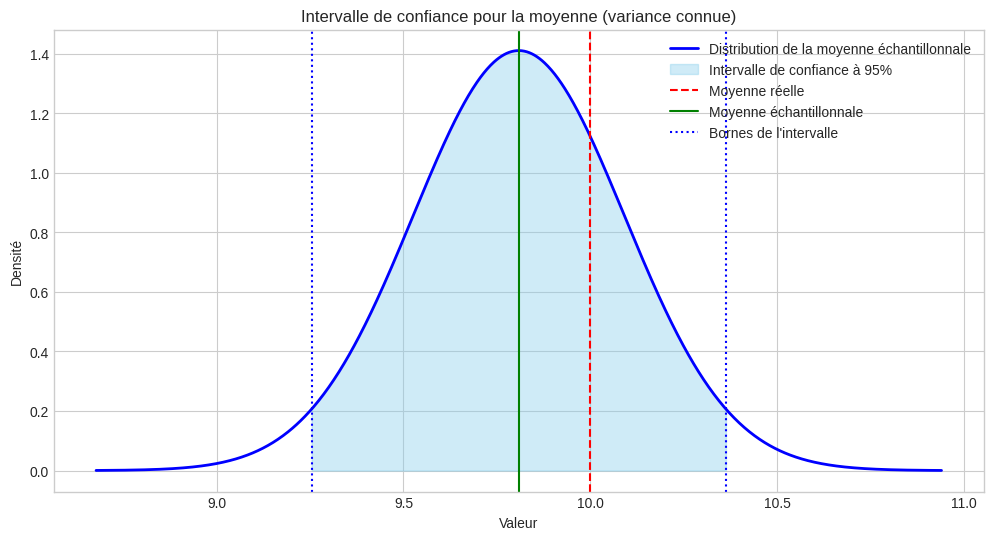

In [36]:
plt.figure(figsize=(12, 6))

# Densité de la loi normale de la moyenne échantillonnale
x = np.linspace(moyenne_echantillon - 4*erreur_standard, moyenne_echantillon + 4*erreur_standard, 1000)
y = stats.norm.pdf(x, moyenne_echantillon, erreur_standard)

plt.plot(x, y, 'b-', linewidth=2, label='Distribution de la moyenne échantillonnale')

# Coloration de l'intervalle de confiance
x_ic = np.linspace(ic_inf, ic_sup, 100)
y_ic = stats.norm.pdf(x_ic, moyenne_echantillon, erreur_standard)
plt.fill_between(x_ic, y_ic, color='skyblue', alpha=0.4, label='Intervalle de confiance à 95%')

# Ajout des lignes verticales
plt.axvline(x=mu_true, color='r', linestyle='--', label='Moyenne réelle')
plt.axvline(x=moyenne_echantillon, color='g', linestyle='-', label='Moyenne échantillonnale')
plt.axvline(x=ic_inf, color='b', linestyle=':', label='Bornes de l\'intervalle')
plt.axvline(x=ic_sup, color='b', linestyle=':')

plt.title('Intervalle de confiance pour la moyenne (variance connue)')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

Illustrons l'effet de la taille de l'échantillon sur la largeur de l'intervalle de confiance :

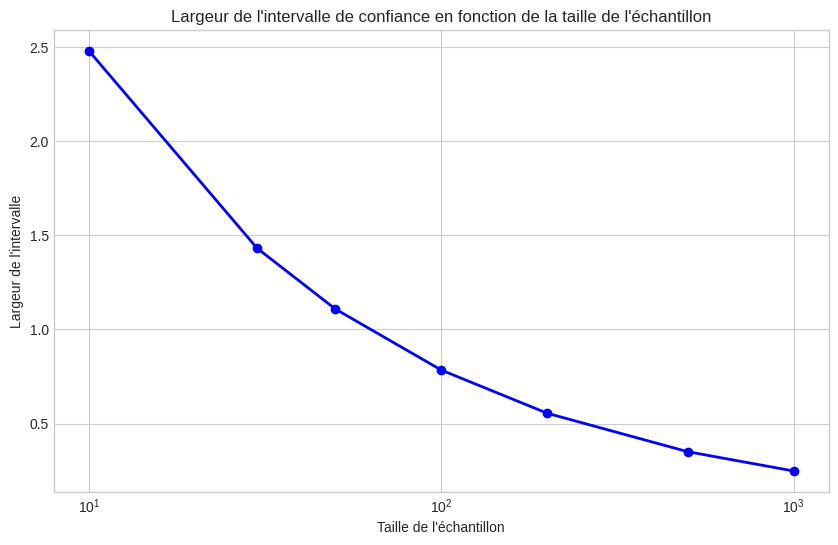

In [37]:
# Différentes tailles d'échantillon
tailles = [10, 30, 50, 100, 200, 500, 1000]
largeurs = []

for n in tailles:
    # Erreur standard
    erreur_std = sigma_true / np.sqrt(n)
    # Largeur de l'intervalle de confiance
    largeur = 2 * z_alpha_2 * erreur_std
    largeurs.append(largeur)

plt.figure(figsize=(10, 6))
plt.plot(tailles, largeurs, 'bo-', linewidth=2)
plt.title('Largeur de l\'intervalle de confiance en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Largeur de l\'intervalle')
plt.xscale('log')
plt.grid(True)
plt.show()

### 2.2 Intervalle de confiance pour la moyenne d'une loi normale (variance inconnue)

Lorsque la variance σ² est inconnue, nous l'estimons à partir de l'échantillon et utilisons la loi de Student (t) au lieu de la loi normale.

In [38]:
# Utilisation du même échantillon que précédemment, mais nous "oublions" la variance réelle
# et l'estimons à partir de l'échantillon

# Estimation de la variance (non biaisée)
variance_estimee = np.var(echantillon, ddof=1)  # ddof=1 pour utiliser n-1 au dénominateur
ecart_type_estime = np.sqrt(variance_estimee)

# Erreur standard estimée
erreur_standard_estimee = ecart_type_estime / np.sqrt(taille_echantillon)

# Quantile de la loi de Student
t_alpha_2 = stats.t.ppf(1 - alpha/2, df=taille_echantillon-1)  # df = degrés de liberté = n-1

# Intervalle de confiance selon la loi de Student
ic_inf_t = moyenne_echantillon - t_alpha_2 * erreur_standard_estimee
ic_sup_t = moyenne_echantillon + t_alpha_2 * erreur_standard_estimee

print(f"Moyenne réelle : {mu_true}")
print(f"Moyenne échantillonnale : {moyenne_echantillon:.4f}")
print(f"Écart-type réel : {sigma_true}")
print(f"Écart-type estimé : {ecart_type_estime:.4f}")
print(f"Intervalle de confiance à 95% (loi normale) : [{ic_inf:.4f}, {ic_sup:.4f}]")
print(f"Intervalle de confiance à 95% (loi de Student) : [{ic_inf_t:.4f}, {ic_sup_t:.4f}]")

Moyenne réelle : 10
Moyenne échantillonnale : 9.8086
Écart-type réel : 2
Écart-type estimé : 1.9615
Intervalle de confiance à 95% (loi normale) : [9.2543, 10.3630]
Intervalle de confiance à 95% (loi de Student) : [9.2512, 10.3661]


Comparons les deux approches (variance connue vs. inconnue) :

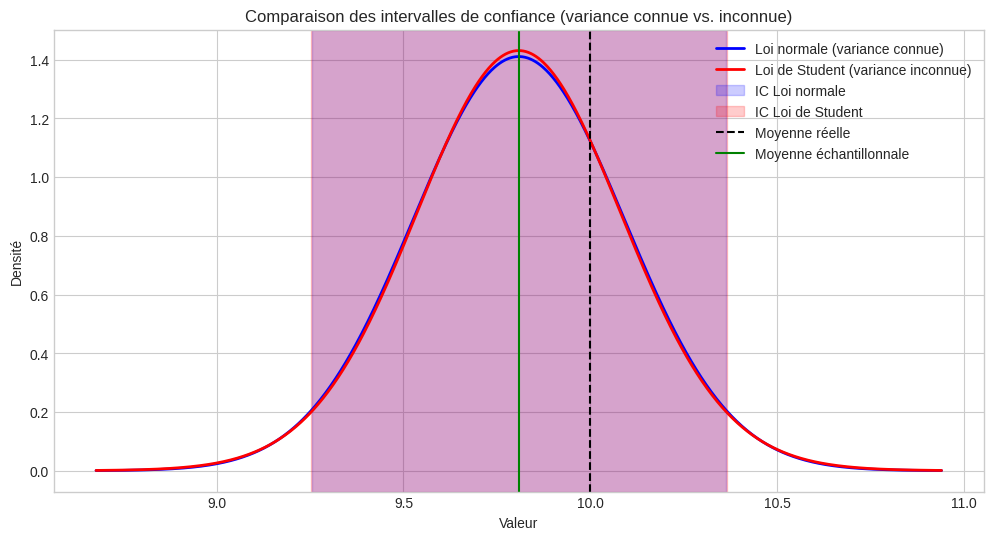

In [39]:
plt.figure(figsize=(12, 6))

# Densité de la loi normale
x = np.linspace(moyenne_echantillon - 4*erreur_standard, moyenne_echantillon + 4*erreur_standard, 1000)
y_norm = stats.norm.pdf(x, moyenne_echantillon, erreur_standard)
plt.plot(x, y_norm, 'b-', linewidth=2, label='Loi normale (variance connue)')

# Densité de la loi de Student
# On ajuste l'échelle pour la comparaison
y_t = stats.t.pdf((x - moyenne_echantillon) / erreur_standard_estimee, df=taille_echantillon-1) / erreur_standard_estimee
plt.plot(x, y_t, 'r-', linewidth=2, label='Loi de Student (variance inconnue)')

# Coloration des intervalles de confiance
plt.axvspan(ic_inf, ic_sup, alpha=0.2, color='blue', label='IC Loi normale')
plt.axvspan(ic_inf_t, ic_sup_t, alpha=0.2, color='red', label='IC Loi de Student')

plt.axvline(x=mu_true, color='k', linestyle='--', label='Moyenne réelle')
plt.axvline(x=moyenne_echantillon, color='g', linestyle='-', label='Moyenne échantillonnale')

plt.title('Comparaison des intervalles de confiance (variance connue vs. inconnue)')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

Voyons l'impact de la taille de l'échantillon sur la différence entre les deux approches :

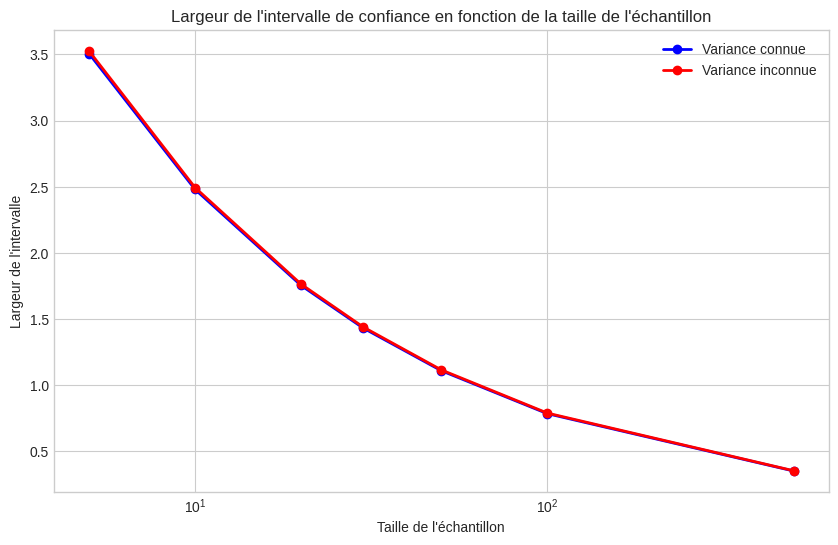

In [40]:
# Différentes tailles d'échantillon
tailles = [5, 10, 20, 30, 50, 100, 500]
largeurs_norm = []
largeurs_t = []

for n in tailles:
    # Erreur standard
    erreur_std = sigma_true / np.sqrt(n)
    # Largeur de l'intervalle de confiance (variance connue)
    largeur_norm = 2 * z_alpha_2 * erreur_std
    largeurs_norm.append(largeur_norm)
    # Erreur standard estimée
    erreur_std_estimee = ecart_type_estime / np.sqrt(n)
    # Largeur de l'intervalle de confiance (variance inconnue)
    largeur_t = 2 * t_alpha_2 * erreur_std_estimee
    largeurs_t.append(largeur_t)

plt.figure(figsize=(10, 6))
plt.plot(tailles, largeurs_norm, 'bo-', linewidth=2, label='Variance connue')
plt.plot(tailles, largeurs_t, 'ro-', linewidth=2, label='Variance inconnue')
plt.title('Largeur de l\'intervalle de confiance en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Largeur de l\'intervalle')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()